In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
jumping_jen = pd.read_csv('../datasets/cleaned_data/jen_jumping_cleaned.csv')
jumping_shreya = pd.read_csv('../datasets/cleaned_data/shreya_jumping_cleaned.csv')
jumping_sirui = pd.read_csv('../datasets/cleaned_data/sirui_jumping_cleaned.csv')

jumping_jen["User"] = 1
jumping_shreya["User"] = 2
jumping_sirui["User"] = 3

jumping_all = jumping_jen.append(jumping_shreya, ignore_index=True).append(jumping_sirui, ignore_index=True)

jumping_all.shape

jumping_all["Activity"] = 2

In [3]:
running_jen = pd.read_csv('../datasets/cleaned_data/jen_running_cleaned.csv')
running_shreya = pd.read_csv('../datasets/cleaned_data/shreya_running_cleaned.csv')
running_sirui = pd.read_csv('../datasets/cleaned_data/sirui_running_cleaned.csv')

running_jen["User"] = 1
running_shreya["User"] = 2
running_sirui["User"] = 3

running_all = running_jen.append(running_shreya, ignore_index=True).append(running_sirui, ignore_index=True)

running_all.shape

running_all["Activity"] = 3

In [4]:
walking_jen = pd.read_csv('../datasets/cleaned_data/jen_walking_cleaned.csv')
walking_shreya = pd.read_csv('../datasets/cleaned_data/shreya_walking_cleaned.csv')
walking_sirui = pd.read_csv('../datasets/cleaned_data/sirui_walking_cleaned.csv')

walking_jen["User"] = 1
walking_shreya["User"] = 2
walking_sirui["User"] = 3

walking_all = walking_jen.append(walking_shreya, ignore_index=True).append(walking_sirui, ignore_index=True)

walking_all.shape

walking_all["Activity"] = 1

### Mark actitvities:
Stand: 0
Walking: 1
Jumping: 2
Running: 3

In [5]:
act_dict = {0: 'stand',
            1: 'walk',
            2: 'jump',
            3: 'run'}

In [6]:
data_all = walking_all.append(running_all, ignore_index=True).append(jumping_all, ignore_index=True)

In [7]:
data_all.shape

(4215, 15)

In [8]:
data_all['label'] =  data_all.Activity.apply(lambda Activity: act_dict[Activity])

In [9]:
data_all.head()

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,A2Y,A2Z,timestamp,User,Activity,label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091553,1.815796,0.358582,0.012451,0.026611,0.003906,1.635344e+12,1,1,walk
1,0.823975,1.937866,1.350403,0.008545,0.027344,0.006836,0.282288,1.258850,1.518250,0.011963,0.014160,0.003418,1.635344e+12,1,1,walk
2,0.701904,1.693726,0.976562,0.011475,0.035645,0.013672,0.473022,1.327515,0.923157,0.015625,0.039795,0.006104,1.635344e+12,1,1,walk
3,1.564026,1.762390,0.480652,0.009521,0.050049,0.013916,1.319885,0.038147,1.304626,0.051270,0.004395,0.047852,1.635344e+12,1,1,walk
4,1.205444,1.449585,0.358582,0.007080,0.015625,0.017334,0.862122,0.473022,0.000000,0.031250,0.031738,0.042236,1.635344e+12,1,1,walk


## Data Exploratory Analysis

In [10]:
metrics = ['G1X', 'G1Y', 'G1Z', 'A1X', 'A1Y', 'A1Z', 'G2X', 'G2Y', 'G2Z', 'A2X', 'A2Y', 'A2Z']

In [11]:
def plot_data(start_position, number_of_frames, metrics=metrics, fourier=False):
    print(f"Looking at {metrics} for {number_of_frames} from {start_position}")
   
    i, j = 0, 0
    for label in data_all.label.unique():
        mini_df = data_all[data_all['label']==label].iloc[start_position:start_position+number_of_frames].reset_index()
        for metric in metrics:
            if metric in ['G2X', 'G2Y', 'G2Z', 'A2X', 'A2Y', 'A2Z']:
                axs[i, 1].plot(mini_df[metric])
            else:
                axs[i, 0].plot(mini_df[metric])
                i = i + 1

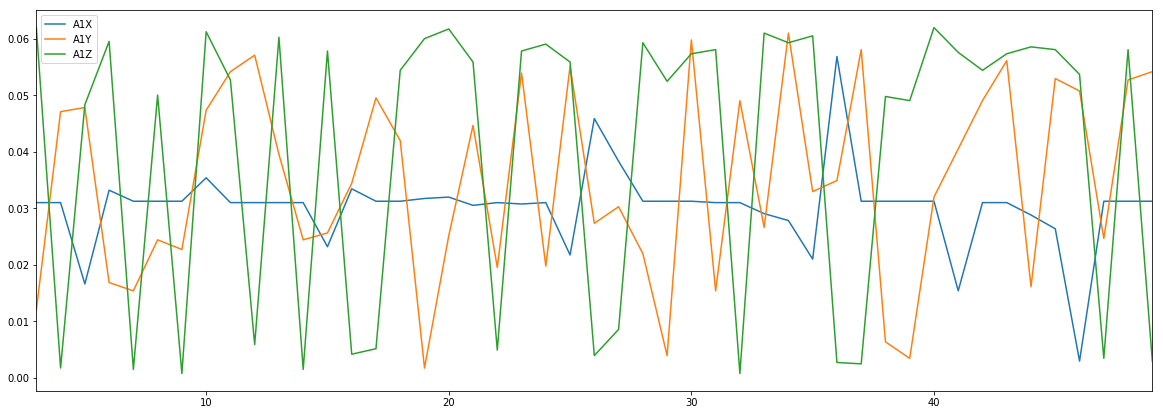

In [12]:
plt.rcParams["figure.figsize"] = (20,7)
jumping_all['A1X'].iloc[3:50].plot()
jumping_all['A1Y'].iloc[3:50].plot()
jumping_all['A1Z'].iloc[3:50].plot()
plt.legend()

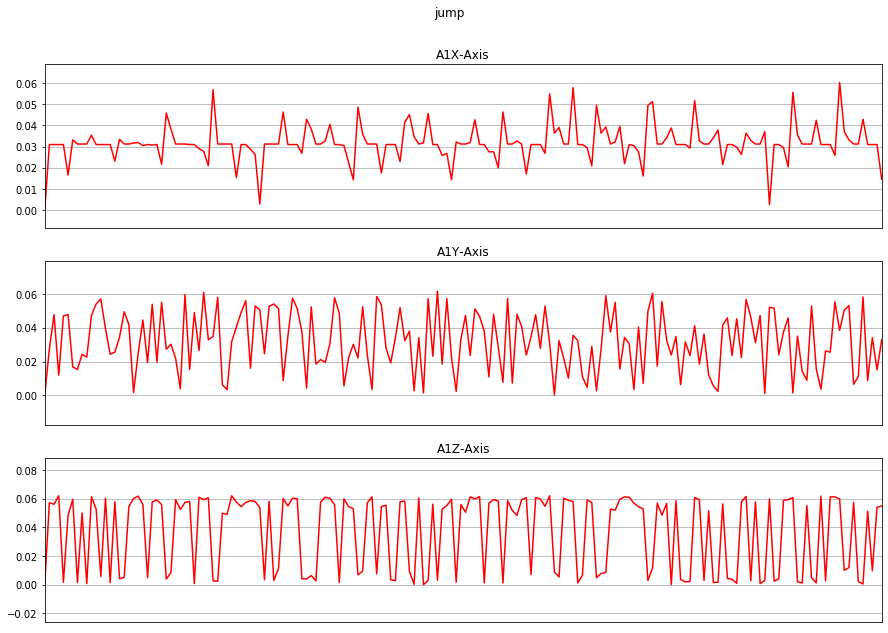

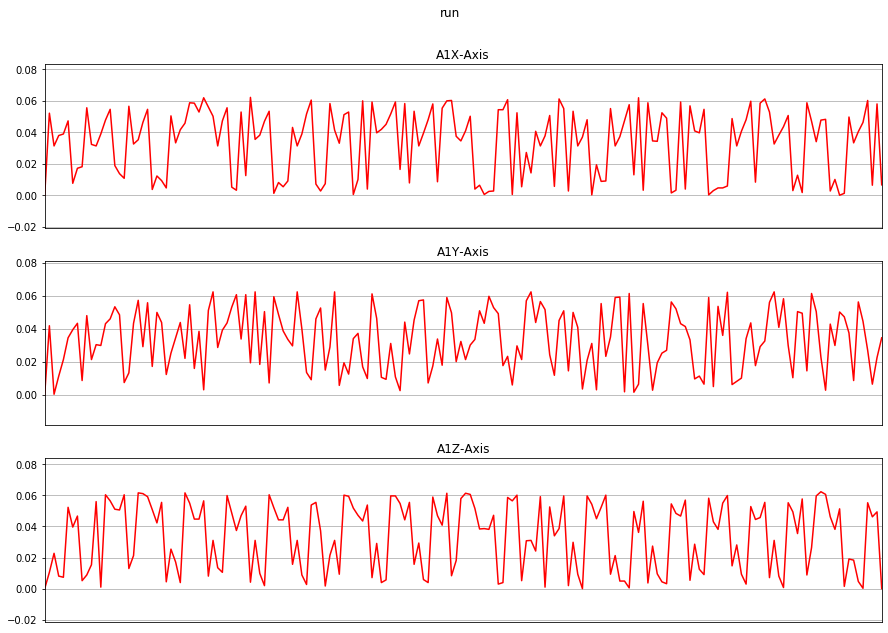

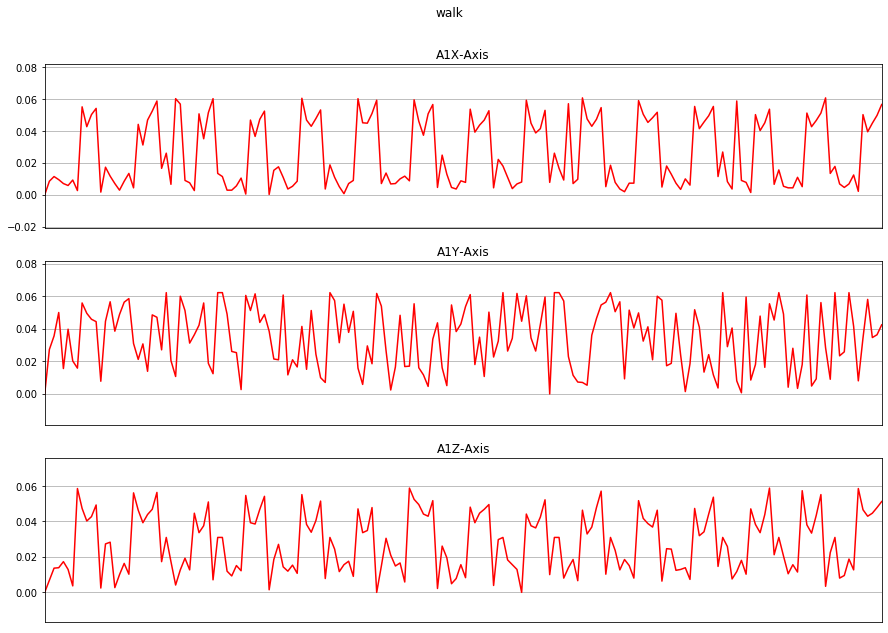

In [13]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, range(len(data['timestamp'])), data['A1X'], 'A1X-Axis')
    plot_axis(ax1, range(len(data['timestamp'])), data['A1Y'], 'A1Y-Axis')
    plot_axis(ax2, range(len(data['timestamp'])), data['A1Z'], 'A1Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for label in np.unique(data_all['label']):
    subset = data_all[data_all['label'] == label][:180]
    plot_activity(label, subset)

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [16]:
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data_all[LABEL] = le.fit_transform(data_all['Activity'].values.ravel())

In [17]:
data_all.columns

Index(['G1X', 'G1Y', 'G1Z', 'A1X', 'A1Y', 'A1Z', 'G2X', 'G2Y', 'G2Z', 'A2X',
       'A2Y', 'A2Z', 'timestamp', 'User', 'Activity', 'label',
       'ActivityEncoded'],
      dtype='object')

In [18]:
df_test = data_all[data_all['User'] > 2]
df_train = data_all[data_all['User'] <= 2]

In [19]:
metrics = ['G1X', 'G1Y', 'G1Z', 'A1X', 'A1Y', 'A1Z', 'G2X', 'G2Y', 'G2Z', 'A2X', 'A2Y', 'A2Z']

In [20]:
pd.options.mode.chained_assignment = None  # default='warn'
for metric in metrics:
    df_train[metric] = df_train[metric] / df_train[metric].max()
# Round numbers
round_dict = {metric: 4 for metric in metrics}
df_train = df_train.round(round_dict)

In [21]:
df_train.head()

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,A2Y,A2Z,timestamp,User,Activity,label,ActivityEncoded
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0471,0.9333,0.1843,0.2000,0.4275,0.0627,1.635344e+12,1,1,walk,0
1,0.4235,0.9961,0.6941,0.1373,0.4392,0.1098,0.1451,0.6471,0.7804,0.1922,0.2275,0.0549,1.635344e+12,1,1,walk,0
2,0.3608,0.8706,0.5020,0.1843,0.5725,0.2196,0.2431,0.6824,0.4745,0.2510,0.6392,0.0980,1.635344e+12,1,1,walk,0
3,0.8039,0.9059,0.2471,0.1529,0.8039,0.2235,0.6784,0.0196,0.6706,0.8235,0.0706,0.7686,1.635344e+12,1,1,walk,0
4,0.6196,0.7451,0.1843,0.1137,0.2510,0.2784,0.4431,0.2431,0.0000,0.5020,0.5098,0.6784,1.635344e+12,1,1,walk,0


In [22]:
# 2s sampling --> 20 samples
TIME_PERIODS = 20
STEP_DISTANCE = 10

In [23]:
def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = 12
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    series_list = []
    for i in range(0, len(df) - time_steps, step):
        for metric in metrics:
            s = df[metric].values[i: i + time_steps]
            series_list.append(s)
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append(series_list)
        series_list = []
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

x_train, y_train = create_segments_and_labels(df_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

In [24]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

x_train shape:  (280, 20, 12)
280 training samples
y_train shape:  (280,)


In [25]:
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

[1, 2, 3]


In [26]:
input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train shape: (280, 240)
input_shape: 240


## Input shape: 20x12 (20 samples/2s and 12 sensor data)

In [27]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [28]:
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (280, 3)


In [29]:
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(Reshape((TIME_PERIODS, 12), input_shape=(input_shape,)))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 20, 12)            0         
_________________________________________________________________
dense (Dense)                (None, 20, 100)           1300      
_________________________________________________________________
dense_1 (Dense)              (None, 20, 100)           10100     
_________________________________________________________________
dense_2 (Dense)              (None, 20, 100)           10100     
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 6003      
Total params: 27,503
Trainable params: 27,503
Non-trainable params: 0
____________________________________________________

In [36]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='../models/best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 400
EPOCHS = 50

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)


Epoch 1/50
1/1 [==============================] - 0s 491ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1271 - val_accuracy: 0.9643
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0734 - accuracy: 0.9866 - val_loss: 0.9112 - val_accuracy: 0.6071
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.5731 - val_accuracy: 0.3571
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 4.1421 - val_accuracy: 0.0536
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0565 - accuracy: 0.9866 - val_loss: 3.7249 - val_accuracy: 0.0893
Epoch 6/50
1/1 [==============================] - 0s 48ms/step - loss: 0.0370 - accuracy: 0.9911 - val_loss: 2.6420 - val_accuracy: 0.3393
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.7504 - val_accuracy: 0.4821
Epoch 8/50
1/1 [==========

Epoch 30/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.0945 - val_accuracy: 0.4464
Epoch 31/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9836 - val_accuracy: 0.4643
Epoch 32/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.8699 - val_accuracy: 0.4821
Epoch 33/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.7584 - val_accuracy: 0.5000
Epoch 34/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.6525 - val_accuracy: 0.5000
Epoch 35/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.5542 - val_accuracy: 0.5357
Epoch 36/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.4644 - val_accuracy: 0.5714
Epoch 37/50
1/1 [===

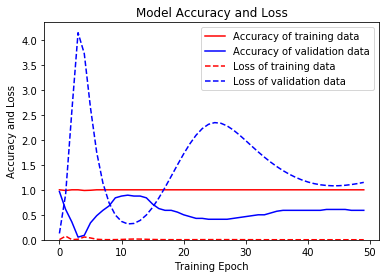

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        93
         1.0       1.00      0.75      0.86        93
         2.0       0.80      1.00      0.89        94

   micro avg       0.92      0.92      0.92       280
   macro avg       0.93      0.92      0.92       280
weighted avg       0.93      0.92      0.92       280



In [37]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))

In [33]:
df_test.shape

(1402, 17)

In [34]:
df_test.head()

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,A2Y,A2Z,timestamp,User,Activity,label,ActivityEncoded
934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.635345e+12,3,1,walk,0
935,1.548767,0.381470,0.099182,0.058105,0.026123,0.054199,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.635345e+12,3,1,walk,0
936,0.915527,1.571655,1.617432,0.059326,0.014160,0.000488,1.533508,0.228882,0.000000,0.03125,0.025879,0.051025,1.635345e+12,3,1,walk,0
937,1.472473,1.831055,0.495911,0.061523,0.000488,0.003906,1.335144,0.213623,0.000000,0.03125,0.061035,0.039795,1.635345e+12,3,1,walk,0
938,0.846863,1.609802,0.694275,0.061523,0.025635,0.000244,0.190735,0.167847,0.915527,0.03540,0.052246,0.043945,1.635345e+12,3,1,walk,0


In [35]:
test_model_df = df_test[df_test["Activity"] == 1]

In [55]:
test_model_df.shape

(476, 17)

In [57]:
metrics = ['G1X', 'G1Y', 'G1Z', 'A1X', 'A1Y', 'A1Z', 'G2X', 'G2Y', 'G2Z', 'A2X', 'A2Y', 'A2Z']

In [69]:
series_list = []
segments = []
for metric in metrics:
    s = test_model_df[metric].values[1: 1+20]
    series_list.append(s)
segments.append(series_list)

In [71]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, 20, 12)

In [74]:
reshaped_segments.shape

(1, 20, 12)

In [72]:
y_pred_test = model_m.predict(reshaped_segments)

In [73]:
y_pred_test

array([[1.0000000e+00, 2.8977685e-17, 2.6952313e-18]], dtype=float32)